In [1]:
import sys
sys.path.append('../src')

from base_sindy import K_Poly_Spline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy.interpolate import UnivariateSpline

/Users/terrycox/UofUCode/NumericalAnaylsisI/numerical_analysis_1/final_project/src/base_sindy.py


In [2]:
x = np.linspace(0,12.5, 30)
c0 = 1
c1 = 1
k = 0.25
noise = np.random.normal(0,0.01,30)
y = c0*np.cos(np.sqrt(k)*x)+c1*np.sin(np.sqrt(k)*x)#+noise

x = [0,1,2,3,4]
y = [21,24,24,18,16]

#cubic_spline = K_Poly_Spline(x,y, k=5, method='GEM')

In [3]:
X = []
X_u = []
splines = {}
usplines = {}
x_s = np.linspace(x[0], x[-1], 200)
for k in range(1, 6):
    spline = K_Poly_Spline(x,y, k=k, method='GEM')
    X.append(spline.interpolate(x_s, 0))
    splines[k] = spline
    
    try:
        spl = UnivariateSpline(x, y, k=k)
        X_u.append(spl(x_s))
        usplines[k] = spl
    except:
        continue
    

		built A and b. SIZE: (8, 8)
1
		built A and b. SIZE: (12, 12)
2
		built A and b. SIZE: (16, 16)
3
2
		built A and b. SIZE: (20, 20)
4
3
		built A and b. SIZE: (24, 24)


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

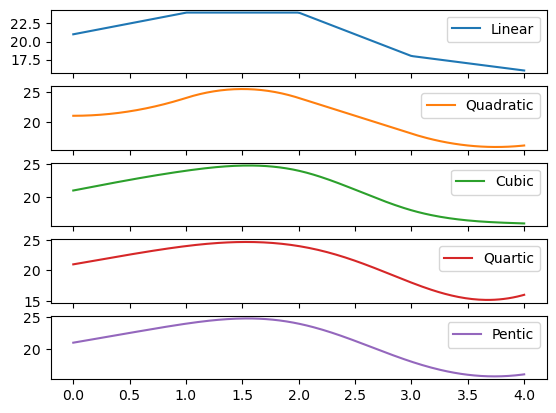

In [4]:
df = pd.DataFrame(np.array(X).T, columns=['Linear','Quadratic','Cubic','Quartic','Pentic'])
df.index = x_s
dfu = pd.DataFrame(np.array(X_u).T, columns=['Linear','Quadratic','Cubic','Quartic'])
dfu.index = x_s
df.plot(subplots=True)

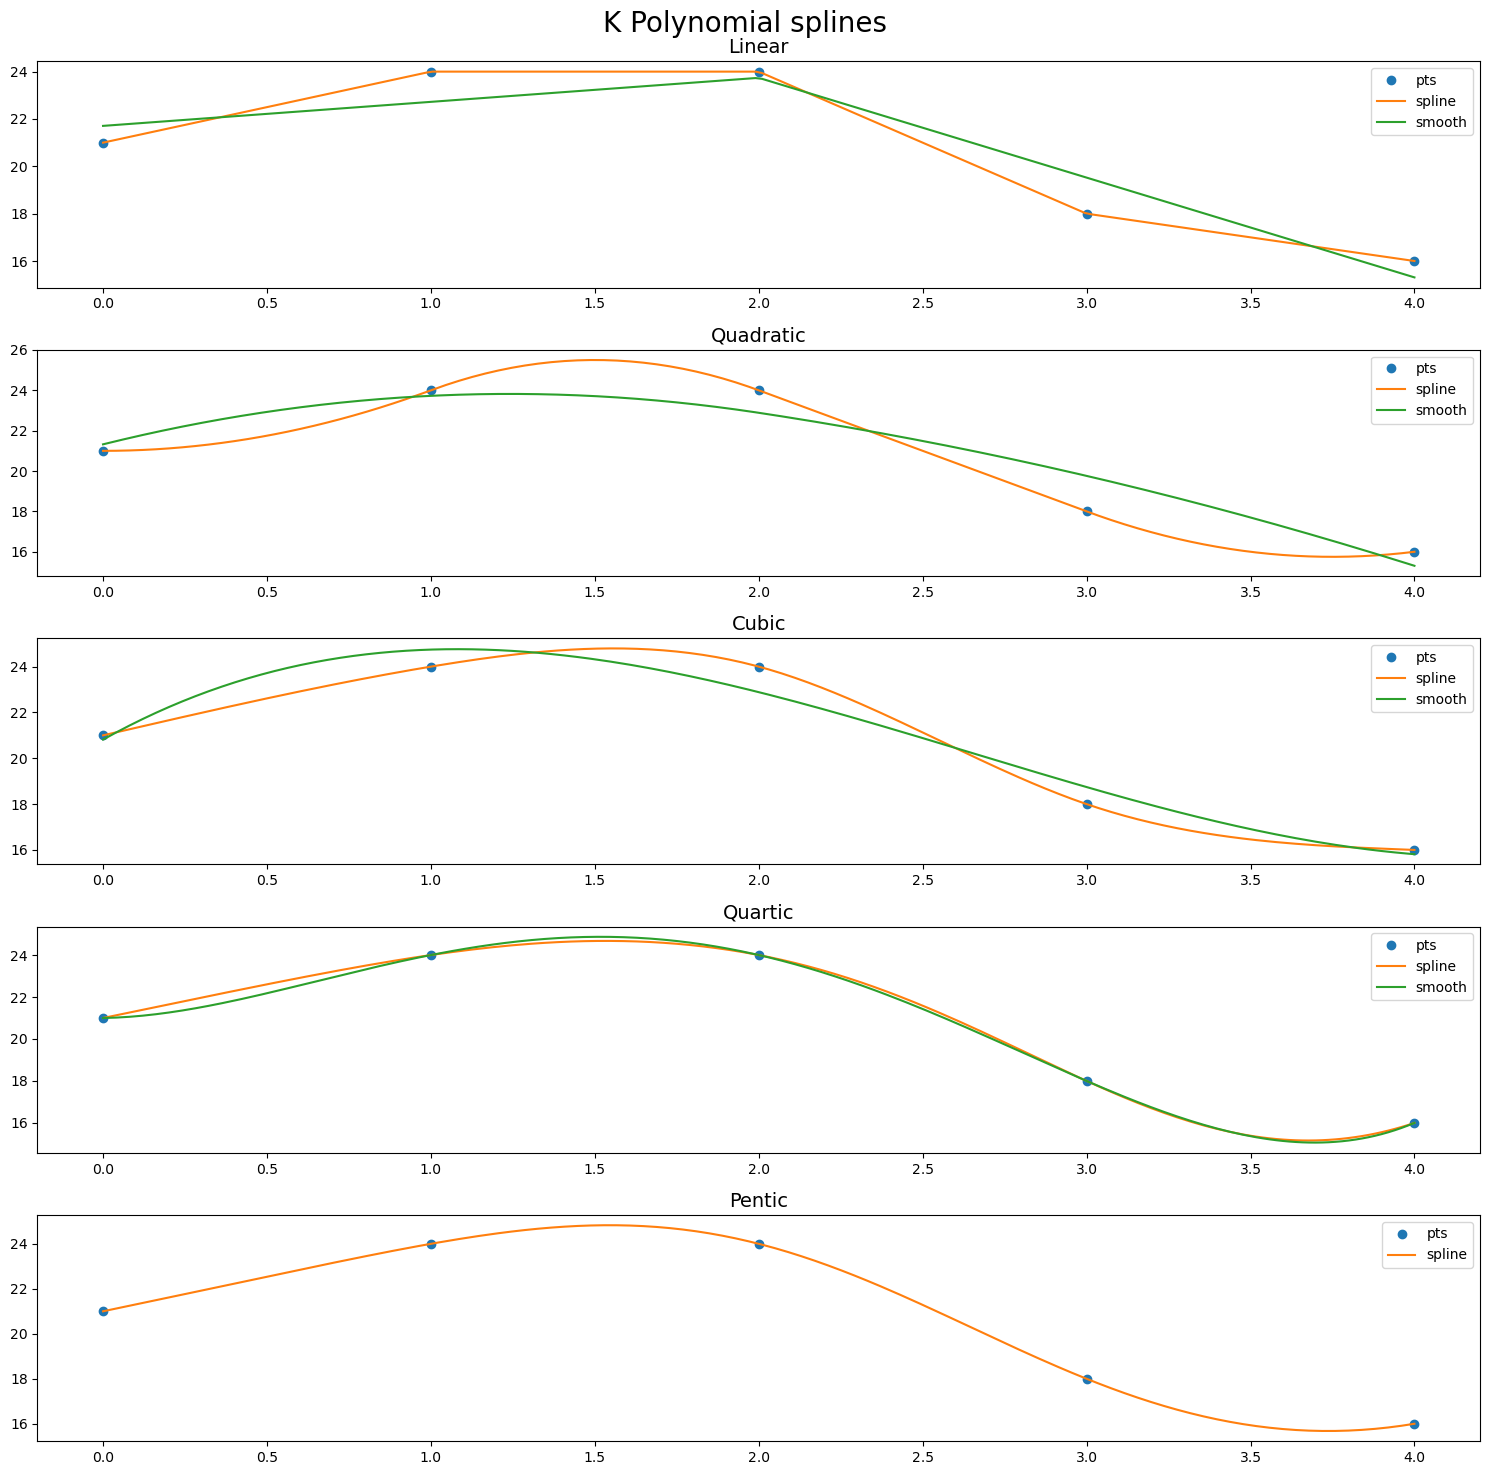

In [5]:

def plot_splines(df, x, y):
    fig, axs = plt.subplots(len(df.columns), figsize=(15,15))
    fig.suptitle('K Polynomial splines', size=20)
    for i, col in enumerate(df.columns):
        
        axs[i].plot(x, y, 'o')
        axs[i].plot(df.index, df[col])
        axs[i].set_title(col, size=14)
        try:
            axs[i].plot(dfu.index, dfu[col])
            axs[i].legend(['pts', 'spline', 'smooth'])
        except:
            axs[i].legend(['pts', 'spline'])
        
    fig.tight_layout()
    fig.savefig('./images/spline_smooth.png')
    plt.show()
    
plot_splines(df, x, y)

In [32]:
plot_splines(df.loc[x[6]:x[10]], x[6:10], y[6:10])

IndexError: list index out of range